<a href="https://colab.research.google.com/github/masa512/ece558/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 5.1

In [1]:
from skimage.data import shepp_logan_phantom 
from skimage.transform import resize,radon
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate Image
N = 32 # pick whatever size
X = resize(shepp_logan_phantom(), (N,N))

In [3]:
def projmtx(N,thetas):
  #Initialize bj's as columns
  B = np.diag(np.ones(N*N))
  M = thetas.shape[0]
  # Radon returns t by ang
  sinos = np.array([radon(B[:,j].reshape(N,N),theta=thetas,circle=False).reshape((-1)) for j in range(N*N)]).T
  return sinos

In [4]:
def art(y,x_0,T):
  x = x_0
  for t in range(2):
    # Lets do the forloop over j and l
    dx = np.linalg.inv(T.T@T)@(T.T @ (y-T@x))
    x = x + dx
  return x

## PART a

/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


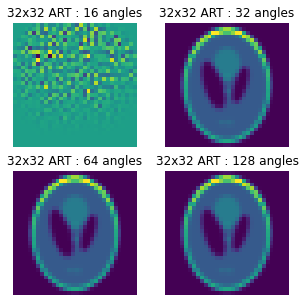

In [ ]:
# 
f,axes = plt.subplots(2,2,figsize=(5,5))
axes = np.ravel(axes)

N_thetas = [16,32,64,128]
for i,Nt in enumerate(N_thetas):

  thetas = np.linspace(0., 180., Nt, endpoint=False).reshape((-1,1))
  x = X.reshape((-1,1))
  T = projmtx(N,thetas)
  y = T @ x

  # ART reconstruction
  x_0 = np.ones_like(x)
  xr = art(y,x_0,T)

  # Plot
  axes[i].imshow(xr.reshape(N,N))
  axes[i].set_title(f'{N}x{N} ART : {Nt} angles')
  axes[i].axis('off')


The reconstruction is fine as long as $N_{\theta} <= N$ where $N$ is one dimension of square image

## ART with positivity constraint

In [5]:
def art_plus(y,x_0,T):
  x = x_0
  for t in range(2):
    # Lets do the forloop over j and l
    dx = np.linalg.inv(T.T@T)@(T.T @ (y-T@x))
    x = x + dx
    x[x<0] = 0 # The positivity constraint!!
  return x


/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


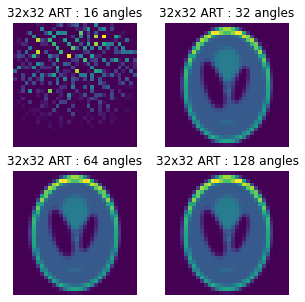

In [6]:
# 
f,axes = plt.subplots(2,2,figsize=(5,5))
axes = np.ravel(axes)

N_thetas = [16,32,64,128]
for i,Nt in enumerate(N_thetas):

  thetas = np.linspace(0., 180., Nt, endpoint=False).reshape((-1,1))
  x = X.reshape((-1,1))
  T = projmtx(N,thetas)
  y = T @ x

  # ART reconstruction
  x_0 = np.ones_like(x)
  xr = art_plus(y,x_0,T)

  # Plot
  axes[i].imshow(xr.reshape(N,N))
  axes[i].set_title(f'{N}x{N} ART : {Nt} angles')
  axes[i].axis('off')


#Problem 5.4

In [11]:
# Case 1 : Limited Angle
Nt = 32
thetas1 = np.linspace(0., 90., Nt, endpoint=False).reshape((-1,1))
T_LA = projmtx(N,thetas1)

# Case 2 : Sparse Data
Nt = 8
thetas2 = np.linspace(0., 180., Nt, endpoint=False).reshape((-1,1))
T_SD = projmtx(N,thetas2)

# Case 3 : Complete Data
Nt = 32
thetas3 = np.linspace(0., 180., Nt, endpoint=False).reshape((-1,1))
T_CD = projmtx(N,thetas3)

/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


Text(0.5, 1.0, 'Complete Angle')

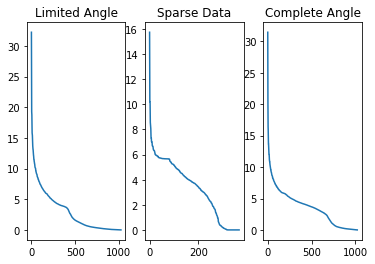

In [12]:
# SVD for case 1
U1,S1,V1T = np.linalg.svd(T_LA)

# SVD for case 2
U2,S2,V2T = np.linalg.svd(T_SD)

# SVD for case 3
U3,S3,V3T = np.linalg.svd(T_CD)

# Plot the singular values
f,axes = plt.subplots(1,3)
axes[0].plot(S1)
axes[0].set_title('Limited Angle')
axes[1].plot(S2)
axes[1].set_title('Sparse Data')
axes[2].plot(S3)
axes[2].set_title('Complete Angle')

In [13]:
def ramp_filter(L):
  # lets assume N is even
  v = np.arange(L)
  v = abs(v - L//2)
  return np.fft.ifftshift(v)


def fbp(y,T,thetas):

  # Reshape y into t vs theta
  Y = y.reshape(-1,thetas.shape[0])

  # Take fft along axis 0
  fY = np.fft.fft(Y,axis=0)

  # Multiply by the ramp filter
  fR = ramp_filter(Y.shape[0]).reshape(-1,1)
  fYR = fY*fR
  

  # Take inversefft and apply T.T
  filtered_Y = np.fft.ifft(fYR,axis=0)
  Xfbp = (T.T)@(filtered_Y.reshape(-1,1))
  return Xfbp

Text(0.5, 1.0, 'FBP: Complete Data')

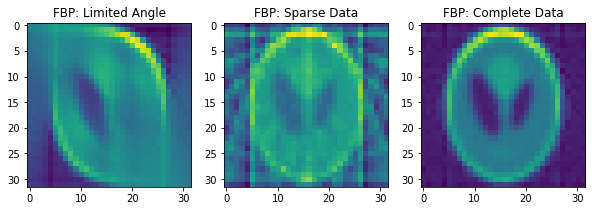

In [55]:
# Forward Projection for three cases
x = X.reshape((-1,1))
y1 = T_LA @ x
y2 = T_SD @ x 
y3 = T_CD @ x

# Perform filtered backprojection
x1 = np.real(fbp(y1,T_LA,thetas1))
x2 = np.real(fbp(y2,T_SD,thetas2))
x3 = np.real(fbp(y3,T_CD,thetas3))

# Reshape and plot
f,axes = plt.subplots(1,3,figsize=(10,10))
X1 = x1.reshape(N,N)
axes[0].imshow(X1)
axes[0].set_title('FBP: Limited Angle')
X2 = x2.reshape(N,N)
axes[1].imshow(X2)
axes[1].set_title('FBP: Sparse Data')
X3 = x3.reshape(N,N)
axes[2].imshow(X3)
axes[2].set_title('FBP: Complete Data')

Text(0.5, 1.0, 'PINV: Complete Data')

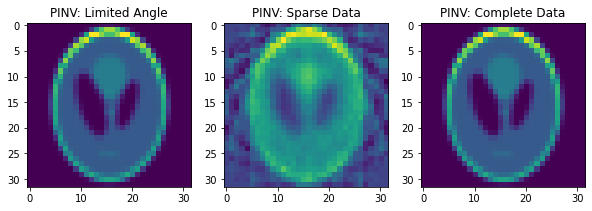

In [56]:
# Use the pseudo-inverse to solve instead
T_LA_inv = np.linalg.pinv(T_LA)
T_SD_inv = np.linalg.pinv(T_SD)
T_CD_inv = np.linalg.pinv(T_CD)

# Apply and plot
x1_pseudo = T_LA_inv @ y1
x2_pseudo = T_SD_inv @ y2
x3_pseudo = T_CD_inv @ y3

# Plot
# Reshape and plot
f,axes = plt.subplots(1,3,figsize=(10,10))
X1_pseudo = x1_pseudo.reshape(N,N)
axes[0].imshow(X1_pseudo)
axes[0].set_title('PINV: Limited Angle')

X2_pseudo = x2_pseudo.reshape(N,N)
axes[1].imshow(X2_pseudo)
axes[1].set_title('PINV: Sparse Data')

X3_pseudo = x3_pseudo.reshape(N,N)
axes[2].imshow(X3_pseudo)
axes[2].set_title('PINV: Complete Data')


# Problem 5.5

In [57]:
# Add sigmal = 0.1 gaussian noise to y1, y2, y3
sigma = 0.1
y1_noisy = y1 + np.random.normal(0,sigma,size = y1.shape)
y2_noisy = y2 + np.random.normal(0,sigma,size = y2.shape)
y3_noisy = y3 + np.random.normal(0,sigma,size = y3.shape)


## Plot the SVD Ratio

In [67]:
def plot_SVD(T,y,title = ''):
  # Plotting the first part
  U,S,Vt = np.linalg.svd(T)
  inner = abs(np.asarray([np.dot(U.T[i,:],y) for i in range(U.shape[0])]).reshape(-1,))

  f,axes = plt.subplots(3,1,figsize=(10,10))
  axes[0].plot(inner)
  axes[0].set_title('Inner Product')

  axes[1].plot(S)
  axes[1].set_title('Singular Values')


  # Trucate the inner products upto Rank
  axes[2].plot((inner[:S.shape[0]]/(S+1e-8)))
  axes[2].set_title('Ratio')

  plt.suptitle(title)

  
  


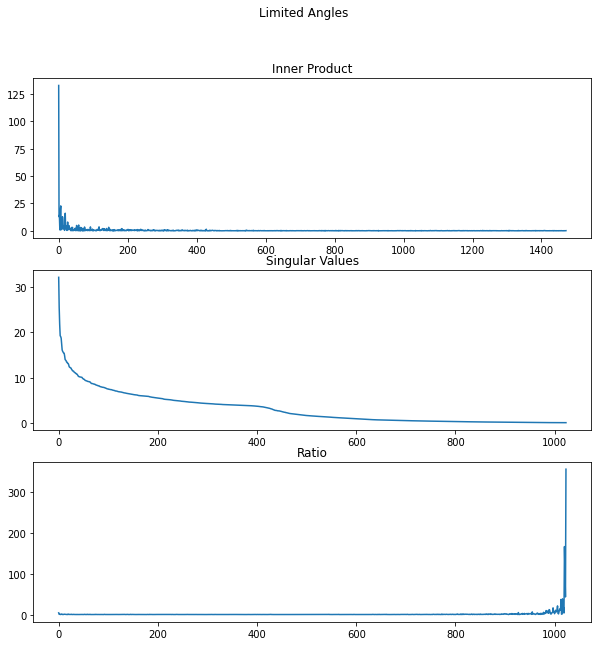

In [68]:
plot_SVD(T_LA,y1_noisy,'Limited Angles')

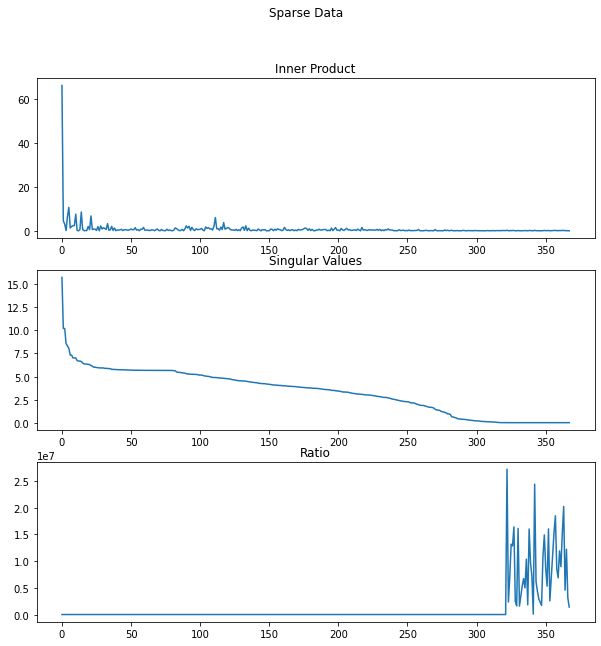

In [69]:
plot_SVD(T_SD,y2_noisy,'Sparse Data')

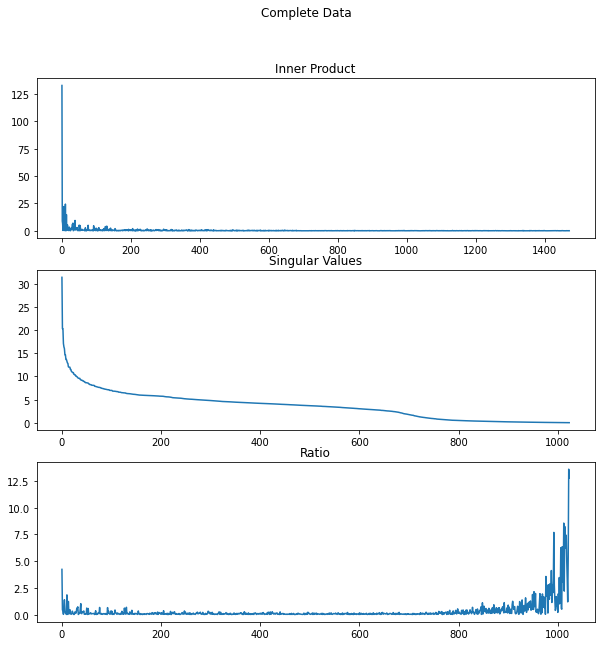

In [70]:
plot_SVD(T_CD,y3_noisy,'Complete Data')

## Plot images of V

In [72]:
def plot_SVD2(T,y,title = ''):
  U,S,Vt = np.linalg.svd(T)
  # Part 2 : Image plot
  f,axes = plt.subplots(2,2,figsize=(10,10))
  axes = axes.ravel()
  idxs = [1,50,100,150]
  
  for i, idx in enumerate(idxs):
    axes[i].imshow(Vt.T[:,idx].reshape(N,N))
    axes[i].set_title('idx = ' + str(idx))
  plt.suptitle(title)

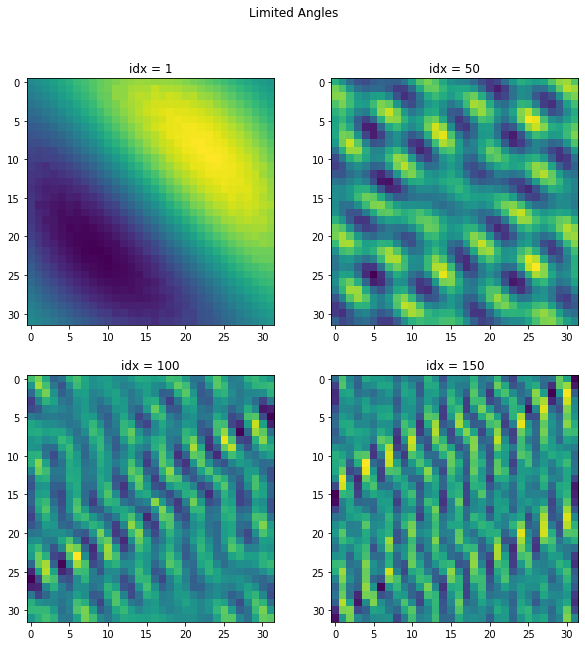

In [73]:
plot_SVD2(T_LA,y1_noisy,'Limited Angles')

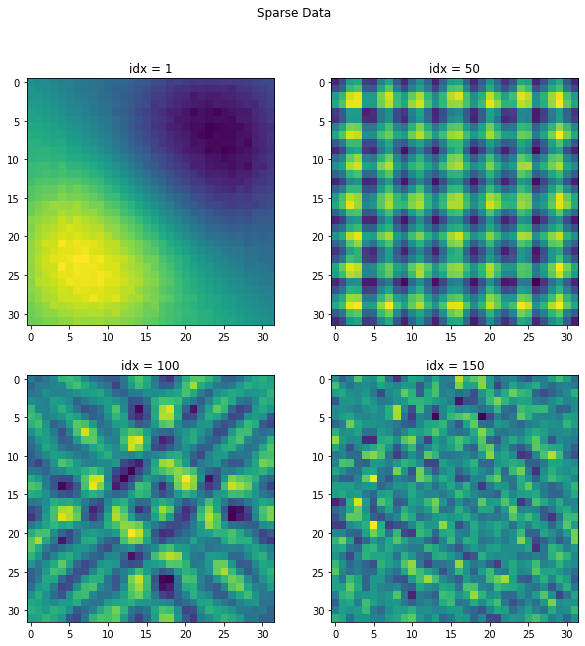

In [74]:
plot_SVD2(T_SD,y2_noisy,'Sparse Data')

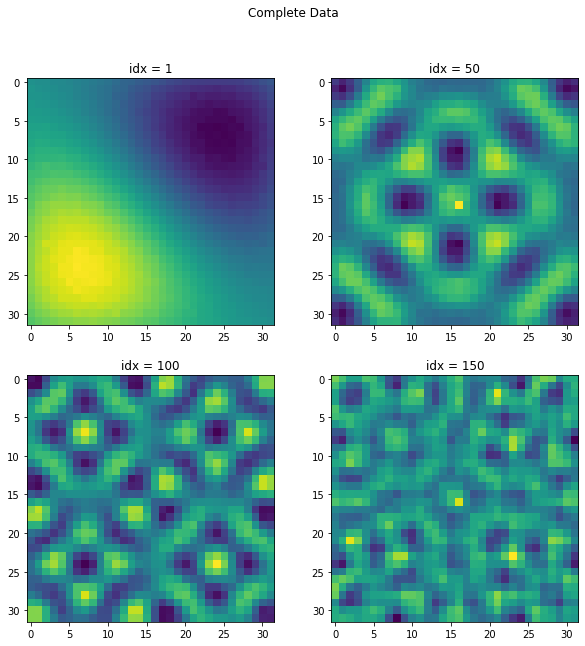

In [75]:
plot_SVD2(T_CD,y3_noisy,'Complete Data')

## Print Condition Number|

In [78]:
def CN_print(T,title):
  _,S,_ = np.linalg.svd(T)
  print('Condition Number for '+title+'= '+str(max(S)/min(S)))

# LA
CN_print(T_LA,'Limited Angle')

# SD
CN_print(T_SD,'Sparse Data')

# LA
CN_print(T_CD,'Complete Data')

Condition Number for Limited Angle= 69452.2916350256
Condition Number for Sparse Data= 1.9747482677758496e+17
Condition Number for Complete Data= 3017.545291147096


## Regularization of the problem